# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 562


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "?q=" + city + "&units=imperial" + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City ({city}) not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | byron bay
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | san antonio de pale
Processing Record 4 of Set 1 | hotan
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | colonia
Processing Record 10 of Set 1 | kirakira
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | aksu
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | illizi
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | williams lake
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1 | necochea
Processing Record 23 of Set 1 | ush

Processing Record 37 of Set 4 | urangan
Processing Record 38 of Set 4 | onega
Processing Record 39 of Set 4 | fisterra
Processing Record 40 of Set 4 | eidson road
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | renk
City (renk) not found. Skipping...
Processing Record 43 of Set 4 | gorom-gorom
Processing Record 44 of Set 4 | murzuq
Processing Record 45 of Set 4 | port alfred
Processing Record 46 of Set 4 | badger
Processing Record 47 of Set 4 | idaho falls
Processing Record 48 of Set 4 | effingham
Processing Record 49 of Set 4 | sodankyla
Processing Record 0 of Set 5 | greymouth
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | flying fish cove
Processing Record 3 of Set 5 | yemetsk
Processing Record 4 of Set 5 | valparaiso
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | turkmenbasy
Processing Record 7 of Set 5 | vilyuchinsk
Processing Record 8 of Set 5 | papao
Processing Record 9 of Set 5 | opuwo
Processing Recor

Processing Record 29 of Set 8 | sampit
Processing Record 30 of Set 8 | kaa-khem
Processing Record 31 of Set 8 | abalak
Processing Record 32 of Set 8 | portel
Processing Record 33 of Set 8 | adh dhibiyah
City (adh dhibiyah) not found. Skipping...
Processing Record 34 of Set 8 | harstad
Processing Record 35 of Set 8 | xilitla
Processing Record 36 of Set 8 | hermantown
Processing Record 37 of Set 8 | la malbaie
Processing Record 38 of Set 8 | la porte
Processing Record 39 of Set 8 | shushenskoye
Processing Record 40 of Set 8 | aldinga beach
Processing Record 41 of Set 8 | las palmas de gran canaria
Processing Record 42 of Set 8 | mana
Processing Record 43 of Set 8 | palapag
Processing Record 44 of Set 8 | puerto baquerizo moreno
Processing Record 45 of Set 8 | sola
Processing Record 46 of Set 8 | ramgundam
City (ramgundam) not found. Skipping...
Processing Record 47 of Set 8 | mili
Processing Record 48 of Set 8 | troitsko-pechorsk
Processing Record 49 of Set 8 | kolonia town
Processing Re

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,byron bay,-28.6500,153.6167,48.70,81,6,4.16,AU,1691614597
1,grytviken,-54.2811,-36.5092,18.66,73,12,5.64,GS,1691614505
2,san antonio de pale,-1.4014,5.6325,74.75,81,90,12.59,GQ,1691614597
3,hotan,37.0997,79.9269,81.82,26,55,6.49,CN,1691614597
4,hilo,19.7297,-155.0900,82.27,86,100,6.91,US,1691614556


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,byron bay,-28.6500,153.6167,48.70,81,6,4.16,AU,1691614597
1,grytviken,-54.2811,-36.5092,18.66,73,12,5.64,GS,1691614505
2,san antonio de pale,-1.4014,5.6325,74.75,81,90,12.59,GQ,1691614597
3,hotan,37.0997,79.9269,81.82,26,55,6.49,CN,1691614597
4,hilo,19.7297,-155.0900,82.27,86,100,6.91,US,1691614556


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

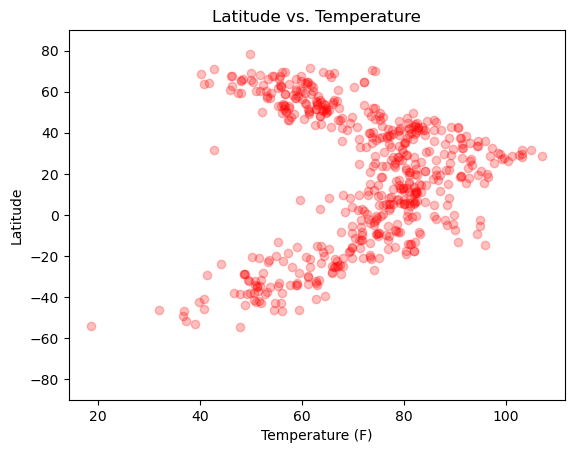

In [86]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Max Temp"]
y_values = city_data_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="red", alpha=0.25)


# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,90)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

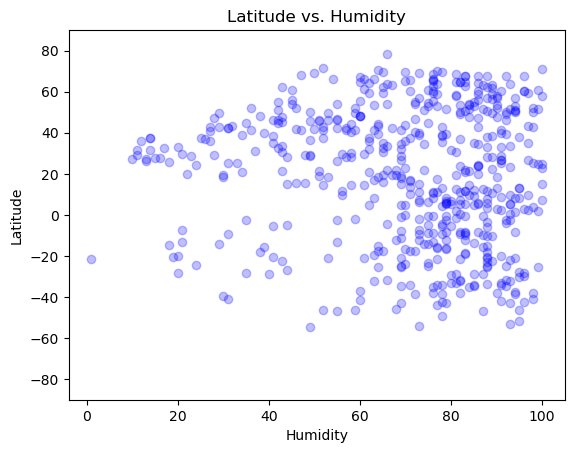

In [87]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Humidity"]
y_values = city_data_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="blue", alpha=0.25)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(-90,90)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

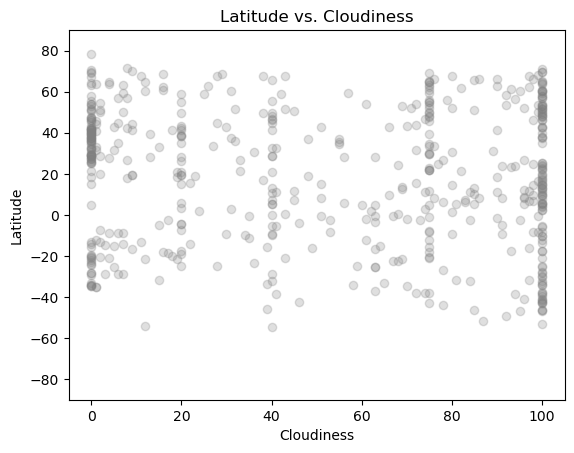

In [88]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Cloudiness"]
y_values = city_data_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="gray", alpha=0.25)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(-90,90)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

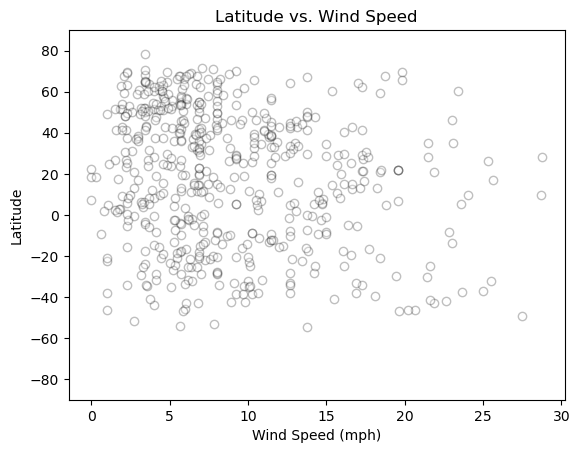

In [90]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Wind Speed"]
y_values = city_data_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="white", edgecolor="black", alpha=0.25)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.ylim(-90,90)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def regression_line(x_values, y_values):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x_values,regress_values,"r-")
    print(f"The equation of the regression line is {line_eq}")
    print(f"The r-squared is: {rvalue**2}")

In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hotan,37.0997,79.9269,81.82,26,55,6.49,CN,1691614597
4,hilo,19.7297,-155.0900,82.27,86,100,6.91,US,1691614556
8,colonia,50.9333,6.9500,64.06,74,0,4.61,DE,1691614348
10,qaqortoq,60.7167,-46.0333,45.84,75,16,4.34,GL,1691614599
11,aksu,41.1231,80.2644,77.65,36,9,2.24,CN,1691614599


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,byron bay,-28.6500,153.6167,48.70,81,6,4.16,AU,1691614597
1,grytviken,-54.2811,-36.5092,18.66,73,12,5.64,GS,1691614505
2,san antonio de pale,-1.4014,5.6325,74.75,81,90,12.59,GQ,1691614597
5,uturoa,-16.7333,-151.4333,76.87,70,9,17.72,PF,1691614598
6,port elizabeth,-33.9180,25.5701,62.89,77,0,17.27,ZA,1691614598


###  Temperature vs. Latitude Linear Regression Plot

The equation of the regression line is y = -0.92x + 105.05
The r-squared is: 0.40434357487814776


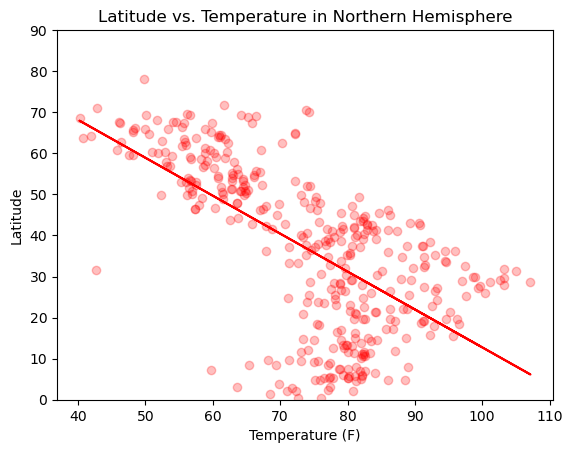

In [95]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="red", alpha=0.25)


# Incorporate the other graph properties
plt.title("Latitude vs. Temperature in Northern Hemisphere")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(0,90)

# Add regression line using defined function
regression_line(x_values, y_values)

# Show plot
plt.show()

The equation of the regression line is y = 0.82x + -76.03
The r-squared is: 0.6889867180288902


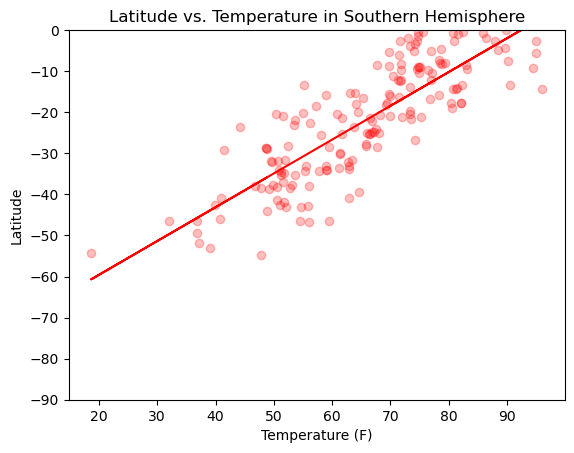

In [94]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="red", alpha=0.25)


# Incorporate the other graph properties
plt.title("Latitude vs. Temperature in Southern Hemisphere")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,0)

# Add regression line using defined function
regression_line(x_values, y_values)

# Show plot
plt.show()

**Discussion about the linear relationship:** Both regression lines demonstrate moderate relationships between temperature and latitude, with higher temperatures as the latitude approaches the equator.

### Humidity vs. Latitude Linear Regression Plot

The equation of the regression line is y = -0.03x + 38.73
The r-squared is: 0.0010389442545774912


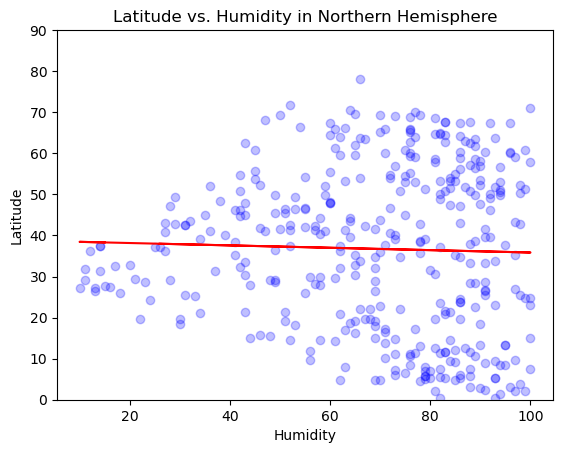

In [102]:
# Northern Hemisphere

# Build scatter plot for latitude vs. humidity
x_values = northern_hemi_df["Humidity"]
y_values = northern_hemi_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="blue", alpha=0.25)


# Incorporate the other graph properties
plt.title("Latitude vs. Humidity in Northern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(0,90)

# Add regression line using defined function
regression_line(x_values, y_values)

# Show plot
plt.show()

The equation of the regression line is y = -0.07x + -17.57
The r-squared is: 0.008779670564337712


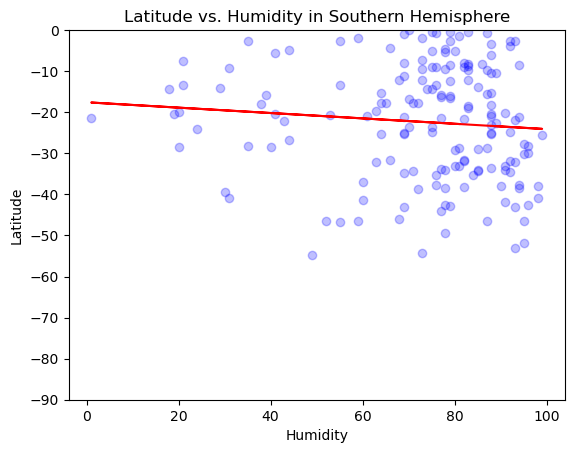

In [103]:
# Southern Hemisphere

# Build scatter plot for latitude vs. humidity
x_values = southern_hemi_df["Humidity"]
y_values = southern_hemi_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="blue", alpha=0.25)


# Incorporate the other graph properties
plt.title("Latitude vs. Humidity in Southern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(-90,0)

# Add regression line using defined function
regression_line(x_values, y_values)

# Show plot
plt.show()

**Discussion about the linear relationship:** Linear regressions assessing northern and southern hemispheres separately suggest there is no significant relationship between latitude and instantaneous humidity, as evidenced by the r-squared values close to zero.

### Cloudiness vs. Latitude Linear Regression Plot

The equation of the regression line is y = -0.06x + 40.09
The r-squared is: 0.017039549257039807


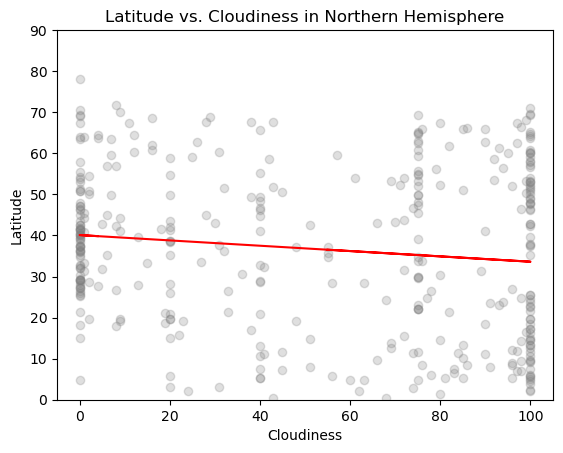

In [104]:
# Northern Hemisphere

# Build scatter plot for latitude vs. cloudiness
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="gray", alpha=0.25)


# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness in Northern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(0,90)

# Add regression line using defined function
regression_line(x_values, y_values)

# Show plot
plt.show()

The equation of the regression line is y = -0.06x + -18.93
The r-squared is: 0.029752998269008814


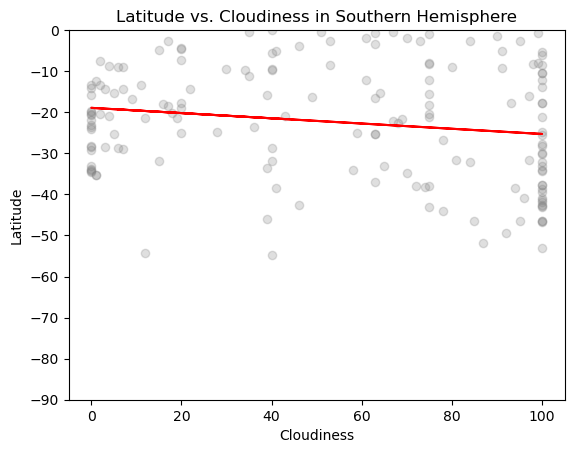

In [105]:
# Southern Hemisphere

# Build scatter plot for latitude vs. cloudiness
x_values = southern_hemi_df["Cloudiness"]
y_values = southern_hemi_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="gray", alpha=0.25)


# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness in Southern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(-90,0)

# Add regression line using defined function
regression_line(x_values, y_values)

# Show plot
plt.show()

**Discussion about the linear relationship:** Linear regressions assessing northern and southern hemispheres separately suggest there is no significant relationship between latitude and instantaneous cloudiness, as evidenced by the r-squared values close to zero.

### Wind Speed vs. Latitude Linear Regression Plot

The equation of the regression line is y = -0.63x + 41.99
The r-squared is: 0.030950098874163313


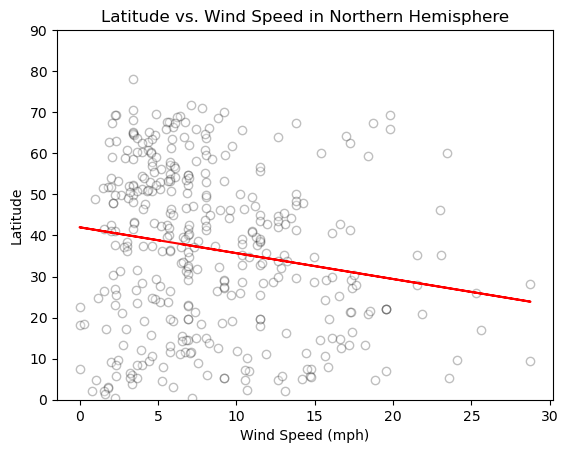

In [106]:
# Northern Hemisphere

# Build scatter plot for latitude vs. windiness
x_values = northern_hemi_df["Wind Speed"]
y_values = northern_hemi_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="white", edgecolor="black", alpha=0.25)


# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed in Northern Hemisphere")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.ylim(0,90)

# Add regression line using defined function
regression_line(x_values, y_values)

# Show plot
plt.show()

The equation of the regression line is y = -0.45x + -17.98
The r-squared is: 0.03428616489931885


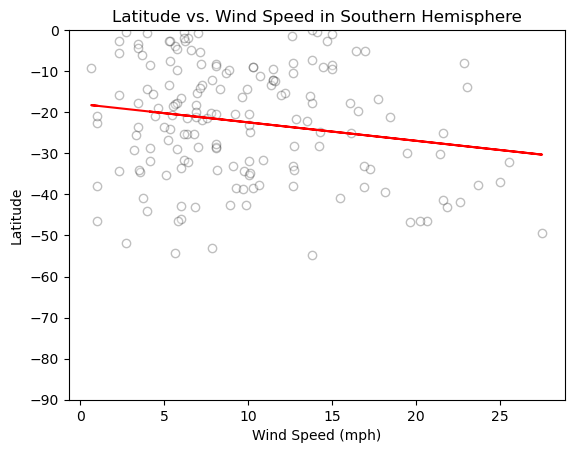

In [107]:
# Southern Hemisphere

# Build scatter plot for latitude vs. windiness
x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df["Lat"]
plt.scatter(x_values, y_values, marker="o", color="white", edgecolor="black", alpha=0.25)


# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.ylim(-90,0)

# Add regression line using defined function
regression_line(x_values, y_values)

# Show plot
plt.show()

**Discussion about the linear relationship:** Linear regressions assessing northern and southern hemispheres separately suggest there is no significant relationship between latitude and instantaneous wind speed, as evidenced by the r-squared values close to zero.